In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

c1 = '#6DB1BF' # cyan
c2 = '#315659' # blue
c3 = '#F98948' # orange
c4 = '#C0DA74' # green
c5 = '#859750' # dark green

data = pd.read_csv('OnlineNewsPopularity_Clean.csv').set_index('url')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39468 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timedelta                     39468 non-null  float64
 1   n_tokens_title                39468 non-null  float64
 2   n_tokens_content              39468 non-null  float64
 3   n_unique_tokens               39468 non-null  float64
 4   n_non_stop_words              39468 non-null  float64
 5   n_non_stop_unique_tokens      39468 non-null  float64
 6   num_hrefs                     39468 non-null  float64
 7   num_self_hrefs                39468 non-null  float64
 8   num_imgs                      39468 non-null  float64
 9   num_videos                    39468 non-null  float64
 10  average_token_length          39468 non-null  float64
 11  num_keywords     

In [2]:
data.describe().T.drop(columns='count').round(3)

,mean,std,min,25%,50%,75%,max
timedelta,355.609,213.930,8.000,167.000,340.500,544.000,731.000
n_tokens_title,10.396,2.113,2.000,9.000,10.000,12.000,23.000
n_tokens_content,546.398,471.047,0.000,246.000,409.000,716.000,8474.000
n_unique_tokens,0.548,3.529,0.000,0.471,0.539,0.609,701.000
n_non_stop_words,0.997,5.243,0.000,1.000,1.000,1.000,1042.000
n_non_stop_unique_tokens,0.689,3.272,0.000,0.626,0.690,0.755,650.000
num_hrefs,10.883,11.309,0.000,4.000,8.000,14.000,304.000
num_self_hrefs,3.297,3.860,0.000,1.000,3.000,4.000,116.000
num_imgs,4.547,8.317,0.000,1.000,1.000,4.000,128.000
num_videos,1.253,4.116,0.000,0.000,0.000,1.000,91.000


In [2]:
data.shares.median()

1400.0

In [3]:
data.sort_values('shares',ascending=False).head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,kw_min_avg,kw_min_max,kw_avg,kw_avg_min,kw_avg_avg,kw_avg_max,kw_max,kw_max_min,kw_max_avg,kw_max_max
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/07/03/low-cost-iphone/,554.0,12.0,688.0,0.500734,1.0,0.643357,28.0,3.0,15.0,1.0,...,3427,843300,iphone,43,4330,843300,iphone rumors,568,97434,843300
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/,633.0,11.0,893.0,0.517202,1.0,0.716730,17.0,11.0,0.0,11.0,...,3431,690400,marketing,76,3789,690400,dove,544,49936,690400
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/,274.0,13.0,2591.0,0.237708,1.0,0.371091,27.0,4.0,1.0,1.0,...,3431,690400,jobs,144,4457,663600,the first 100,642,64524,663600
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/,416.0,9.0,134.0,0.689394,1.0,0.851852,1.0,1.0,0.0,2.0,...,3267,652900,creativity,596,40771,652900,yeezus,213,66531,652900
http://mashable.com/2013/03/02/wealth-inequality/,677.0,11.0,382.0,0.487805,1.0,0.605809,15.0,3.0,11.0,1.0,...,3354,617900,videos,5,3666,617900,conversations,36,4365,690400
http://mashable.com/2013/11/12/roomba-880-review/,422.0,8.0,261.0,0.571429,1.0,0.595628,24.0,5.0,18.0,1.0,...,3491,843300,reviews,91,4876,441000,vacuum,728,75503,441000
http://mashable.com/2014/01/14/australia-heatwave-photos/,359.0,9.0,192.0,0.647368,1.0,0.754098,7.0,4.0,0.0,2.0,...,3223,310800,photography,4,3600,310800,australia,110,4064,310800
http://mashable.com/2013/03/28/blackberry-1-million/,651.0,10.0,905.0,0.460067,1.0,0.645161,3.0,2.0,21.0,0.0,...,3427,843300,blackberry,411,5477,306100,blackberry 10,469,9998,306100
http://mashable.com/2013/11/14/ibm-watson-brief/,420.0,12.0,198.0,0.556122,1.0,0.634921,15.0,1.0,14.0,1.0,...,3249,298400,first to know,183,3711,298400,yotaphone,678,100459,298400


# Distributions
Plotted the distribution of the different columns. Since theres a lot of outliers, I'll limit the range

In [4]:
# find amount of numerica columns
num_col = data.dtypes.value_counts().float64 + data.dtypes.value_counts().int64
print('there are %d numeric columns' % num_col)

there are 46 numeric columns


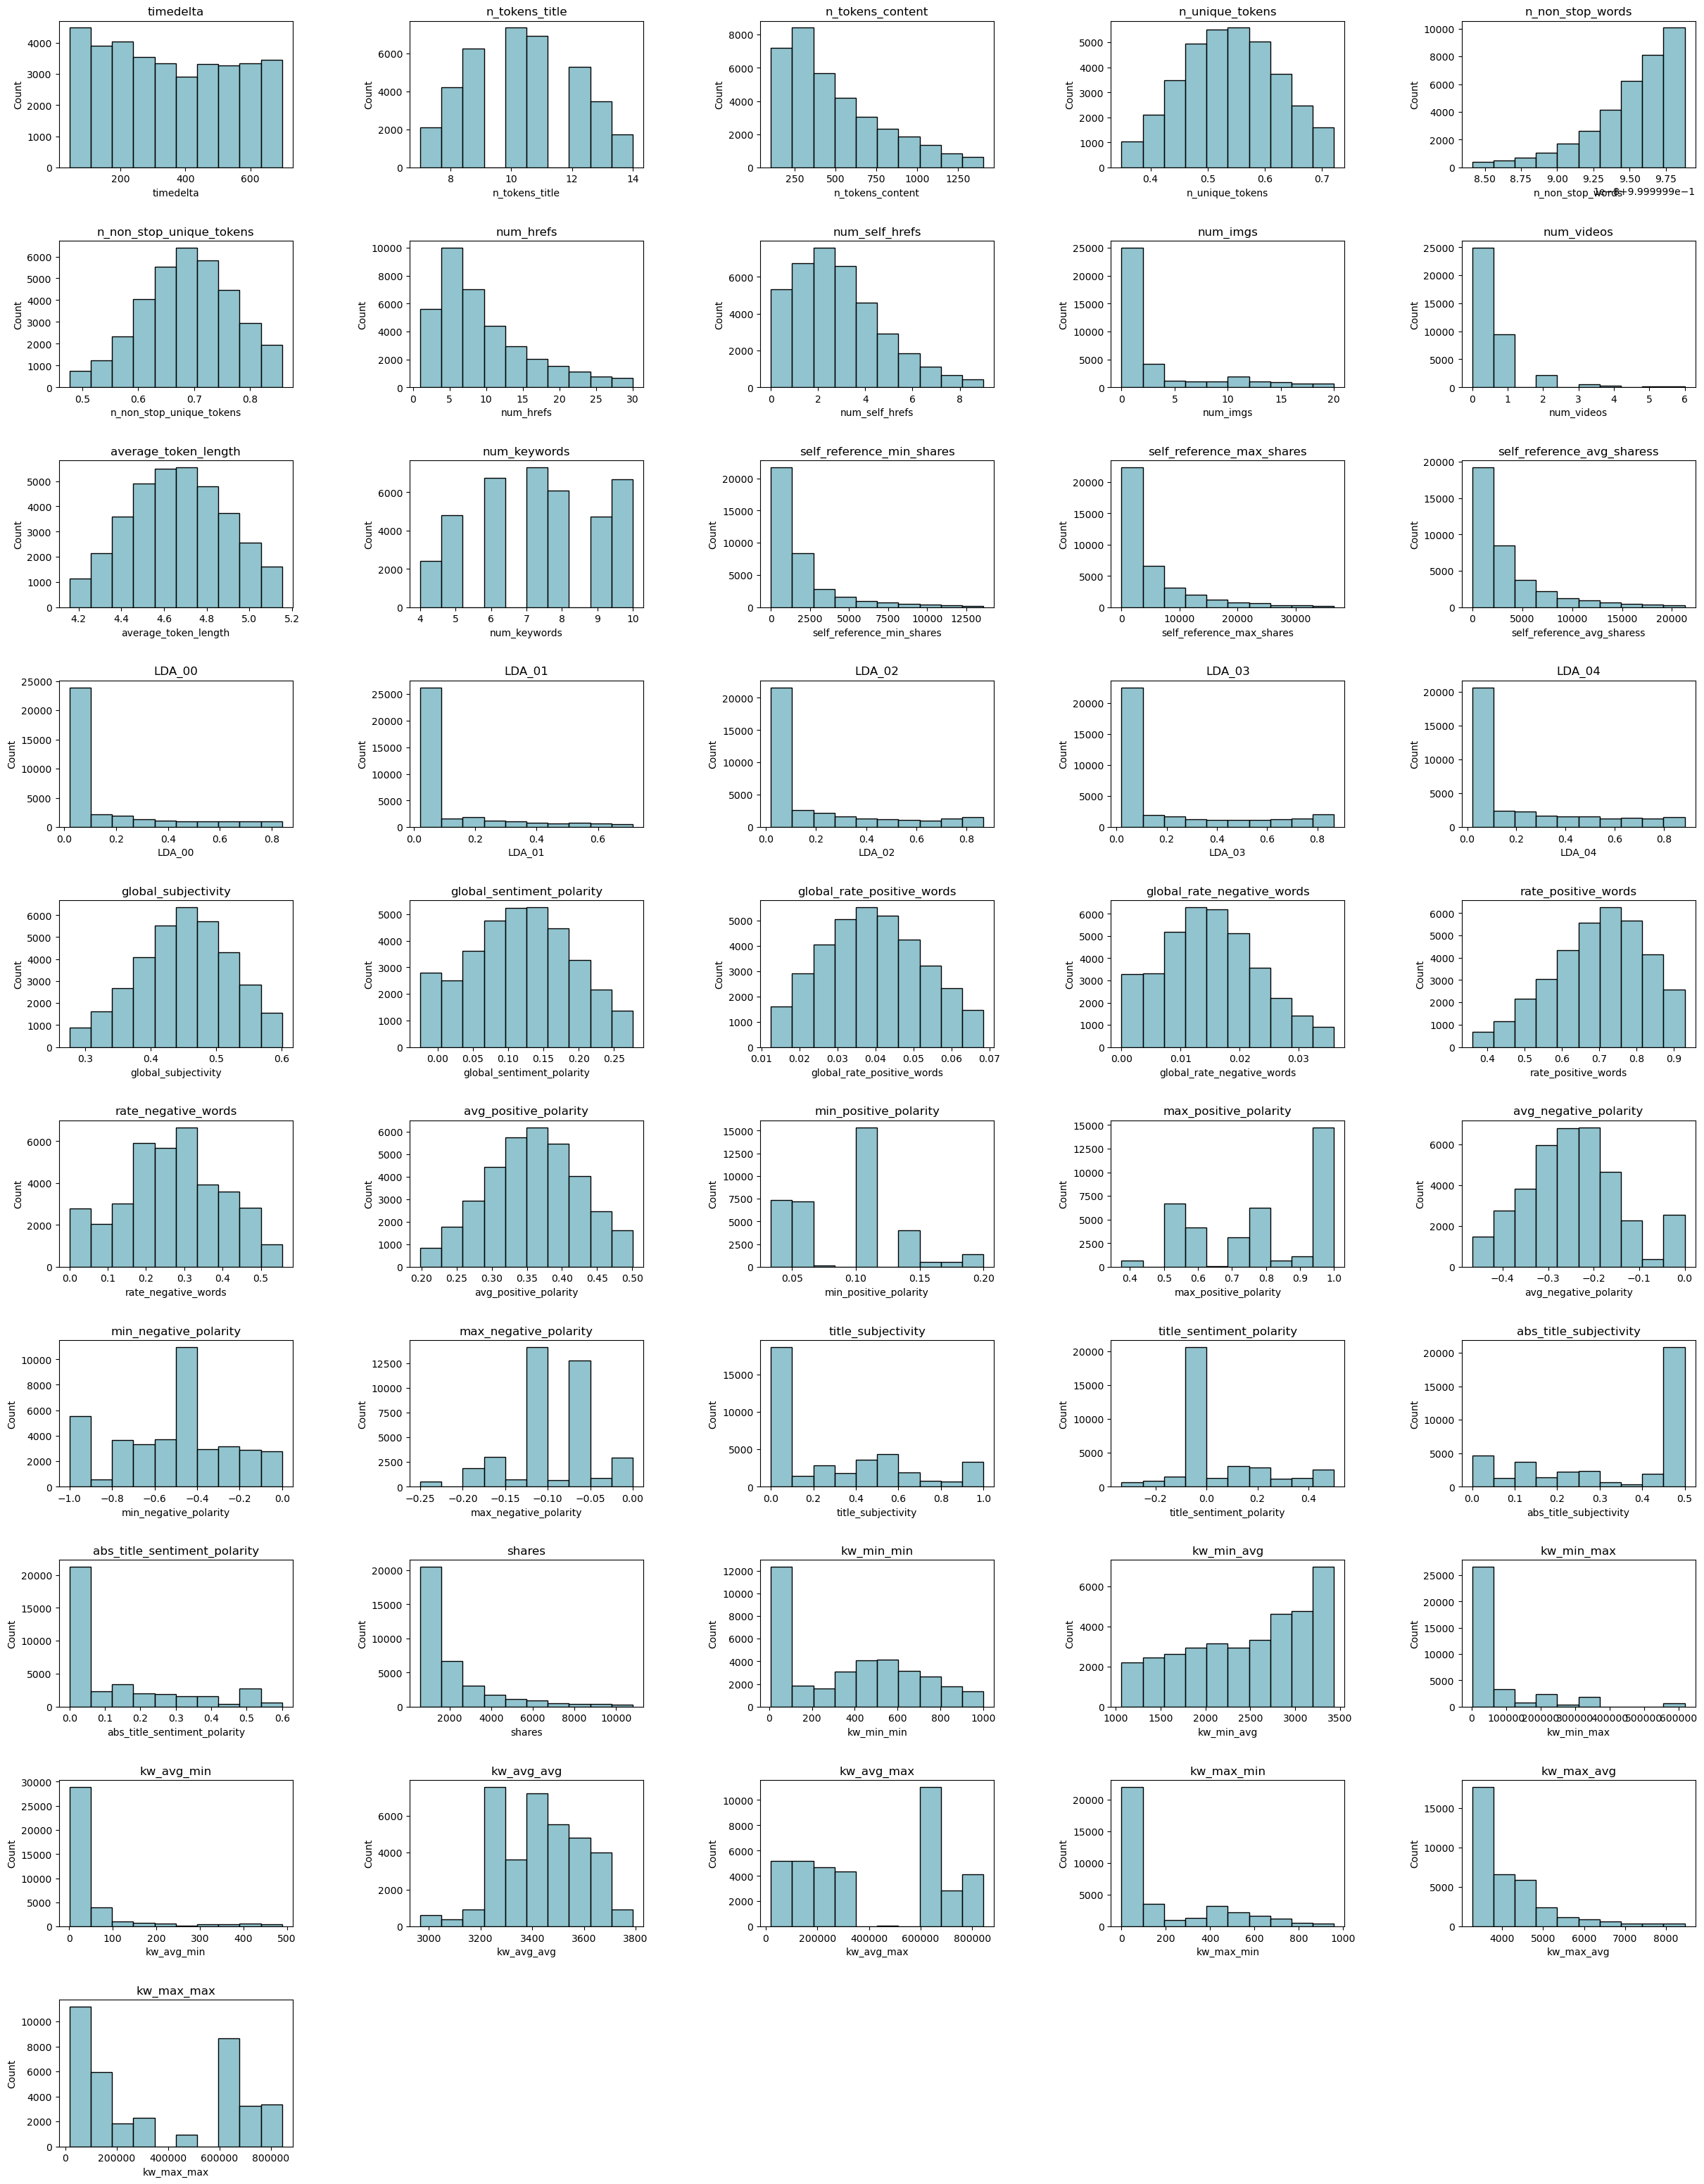

In [5]:
np.seterr(divide='ignore', invalid='ignore')

plt.figure(figsize=(30,40),dpi=100)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

n=1
for col_name in data.columns:
    if data[col_name].dtypes == int or data[col_name].dtypes == float:
        plt.subplot(10,5,n)
        range_lim = np.percentile(data[col_name],[5,95])
        sns.histplot(data=data,
                     x=col_name,
                     color=c1,
                     bins=10,
                     legend=False,
                     binrange=range_lim)
        plt.title(col_name)
        n+=1

Since alot of these distributions rely on the shares, alot of them have the same outlier problem from viral articles. Of the other columns we can gather that Mashables articles

- Tend to be on the positive side and somewhat subjective
- Tend to have 10 word article titles that are rather subjective
- Have an average word length of five letters

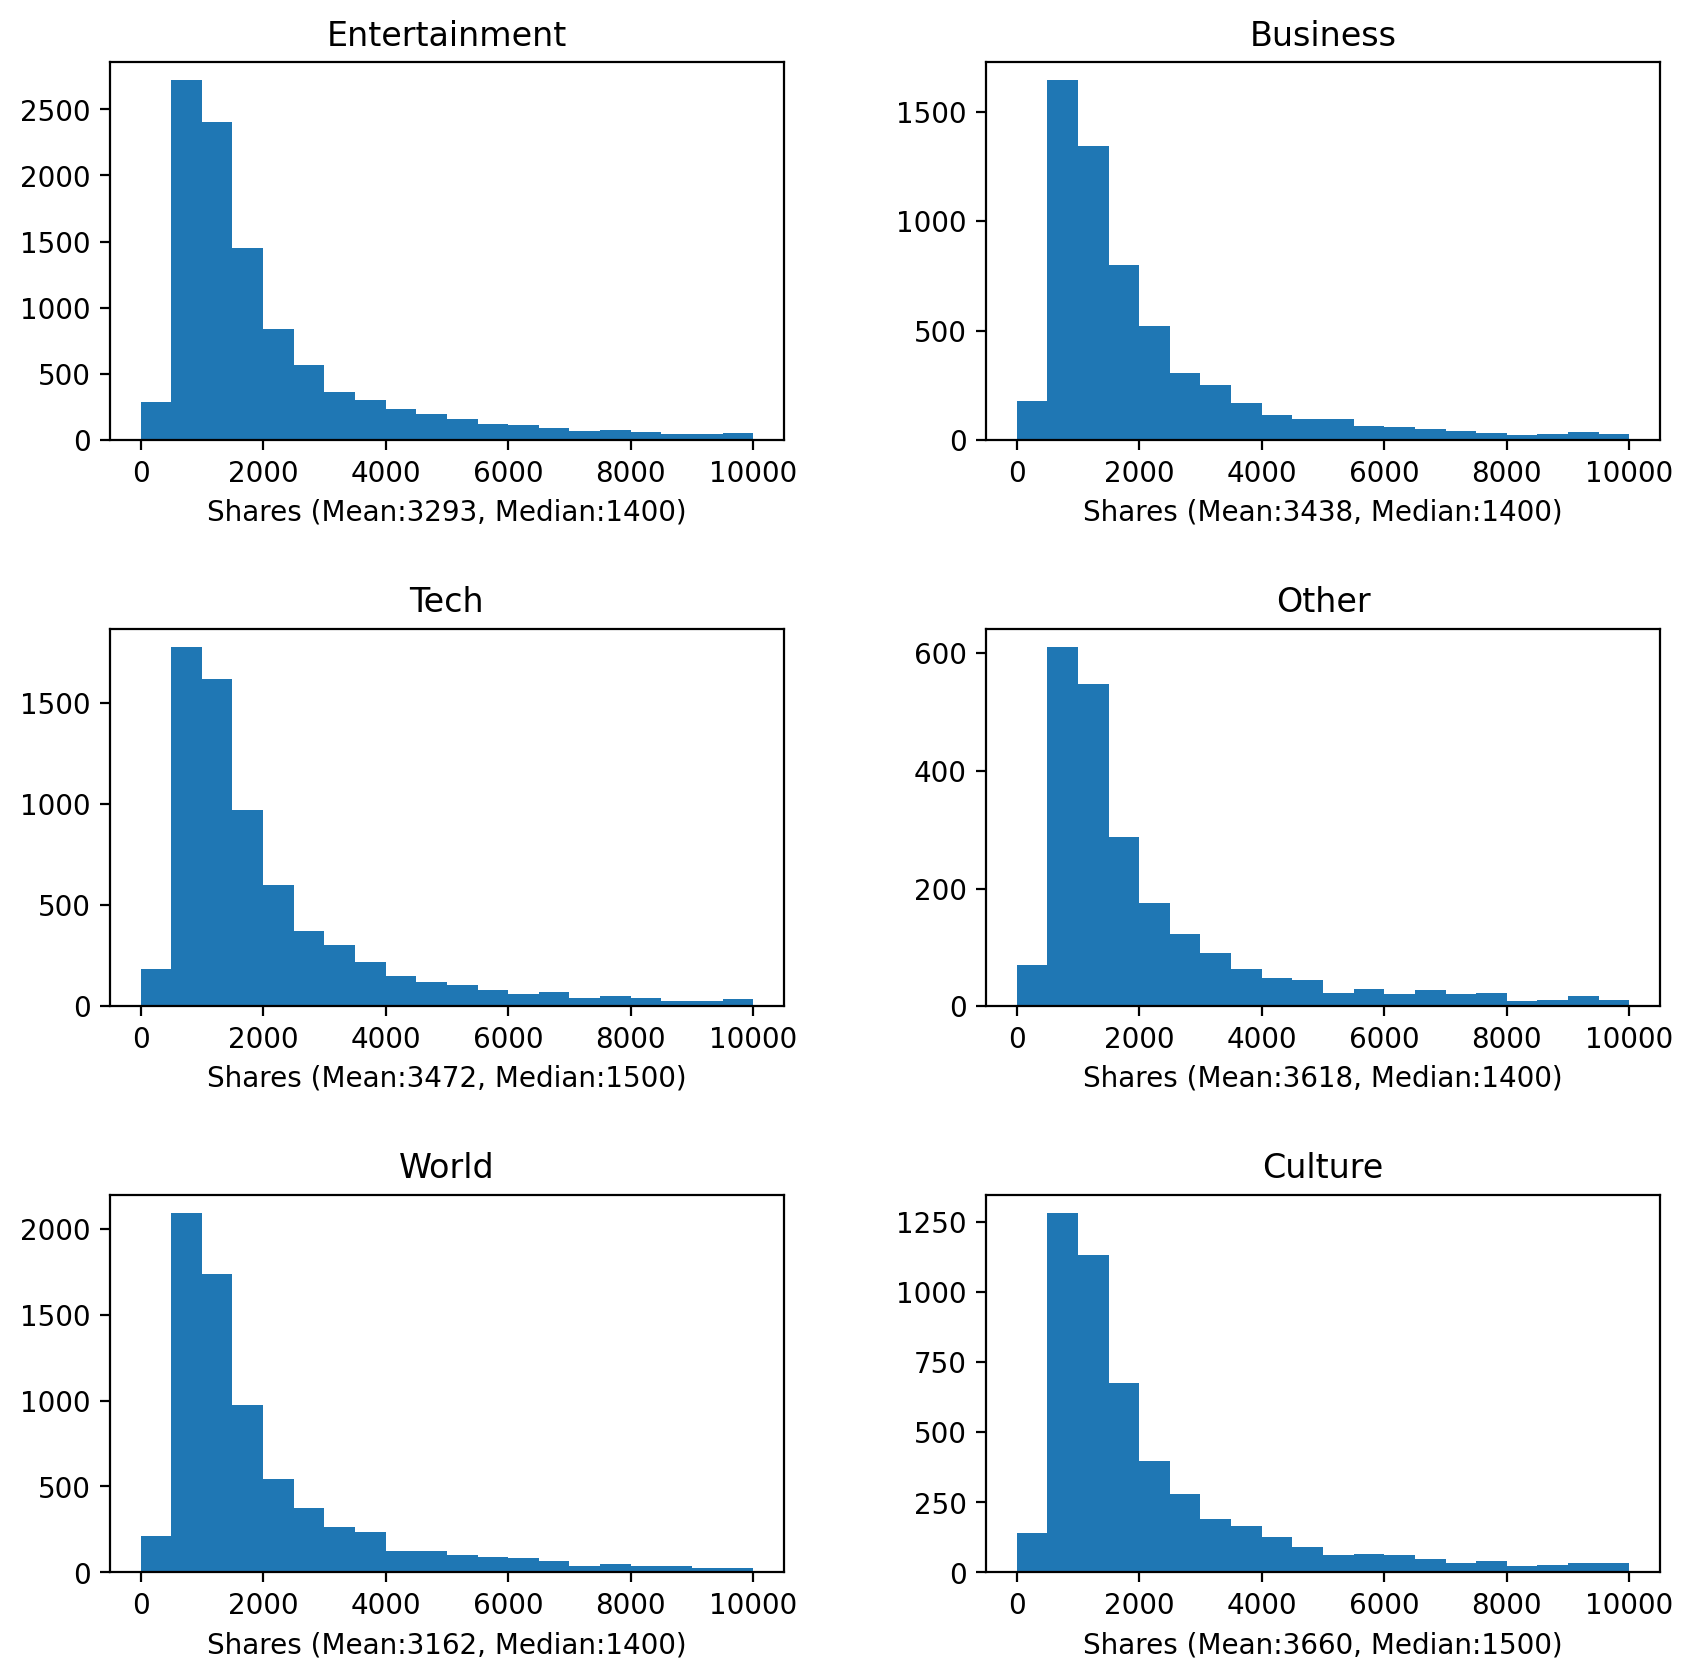

In [6]:
def plot_hist(data,col,x,y,rangemax=None):
    '''
    Plots a histogram for each entry in a specified column
    Allows for a max range to be selected.
    '''
        
    if rangemax == None:
        switch = True
    else:
        switch = False
        
    plt.figure(figsize=(10,10),dpi=200)
    plt.subplots_adjust(hspace=.5,wspace=.3)
    
    for index,entry in enumerate(data[col].unique(),1):
        shares = data[data[col]==entry]["shares"]
        
        if switch == True:
            rangemax=shares.max()
        
        plt.subplot(int(str(y)+str(x)+str(index)))
        plt.hist(shares,bins=20,range=(0,rangemax))
        plt.title(str(entry))
        label = ('Shares (Mean:%d, Median:%d)' % (shares.mean(),shares.median()))
        plt.xlabel(label)
        
plot_hist(data,'channel',2,3,rangemax=10000)  

So it seems a great majority of articles only get around 1500 shares. It doesn't look like theres much of a difference between the data channels

# Week Break Down

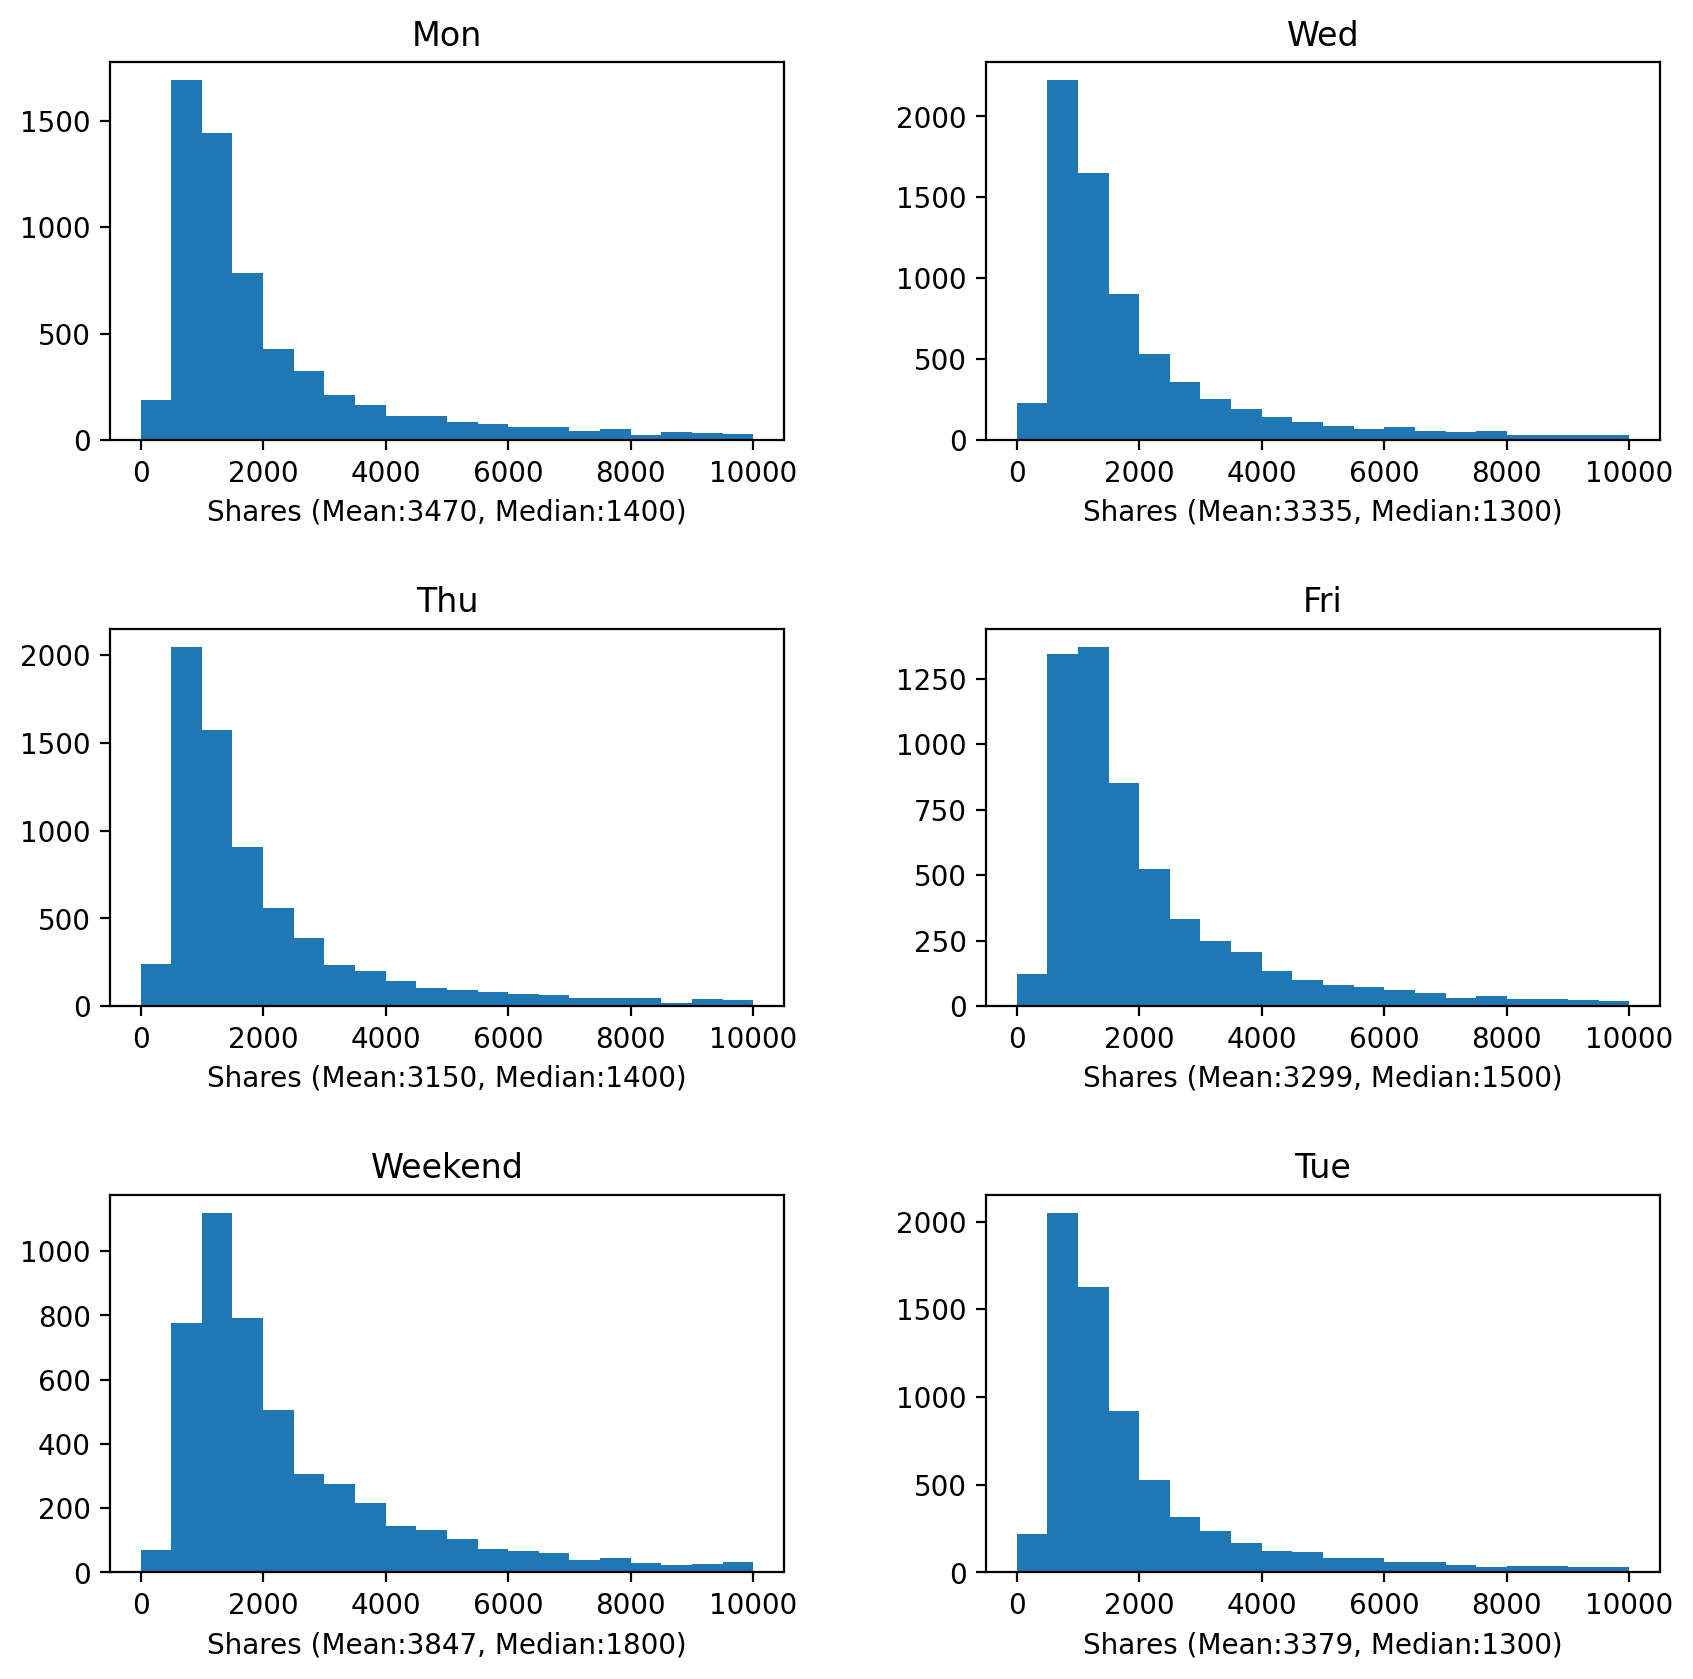

In [7]:
plot_hist(data,'weekday',2,3,rangemax=10000)  

Despite having less articles, those published on the weekend seem to have both a higher mean and median. 

# Dates
Lets see what Mashable's articles shares look like over the months.

In [8]:
import matplotlib.dates as pltd
from datetime import datetime

def plot_date(data,label=None):
    '''
    Plots the shares by dates.
    '''
    plt.figure(figsize=(11,5),dpi=200)
    ax = plt.subplot(111)
    plt.plot_date(data.index,data.shares,xdate=True,linestyle='-',marker=None,label=label,color=c1)
    plt.xlim([datetime(2013, 2, 1), datetime(2015, 1, 1)])
    plt.xlabel('Date')
    ax.xaxis.set_minor_locator(pltd.MonthLocator())
    ax.xaxis.set_major_locator(pltd.YearLocator())
    ax.xaxis.set_major_formatter(pltd.DateFormatter('%Y'))
    ax.xaxis.set_minor_formatter(pltd.DateFormatter('%m'))
    plt.grid(which='both',linestyle=':');
    if label != None:
        plt.legend()
        
# convert the dates to datetime objects
shares_dates = data.reset_index().set_index(pd.DatetimeIndex(data['date'])).drop(columns = 'date')[['shares']]

Text(0.5, 1.0, 'Max Article Shares Per Week')

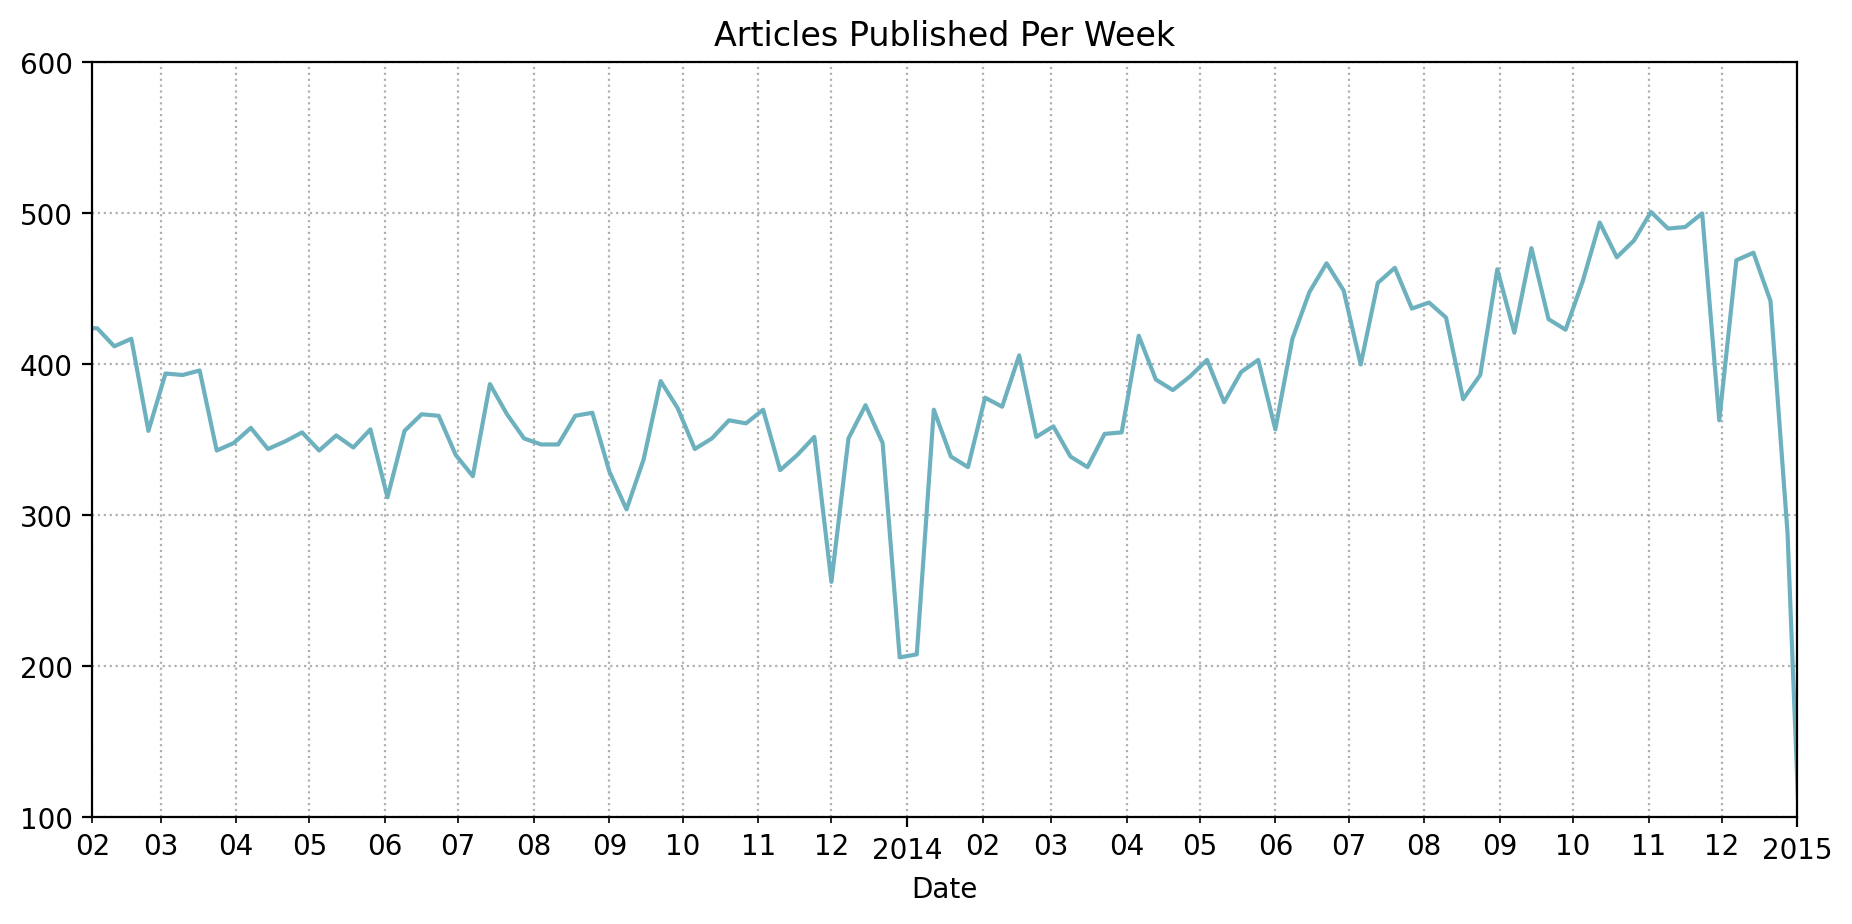

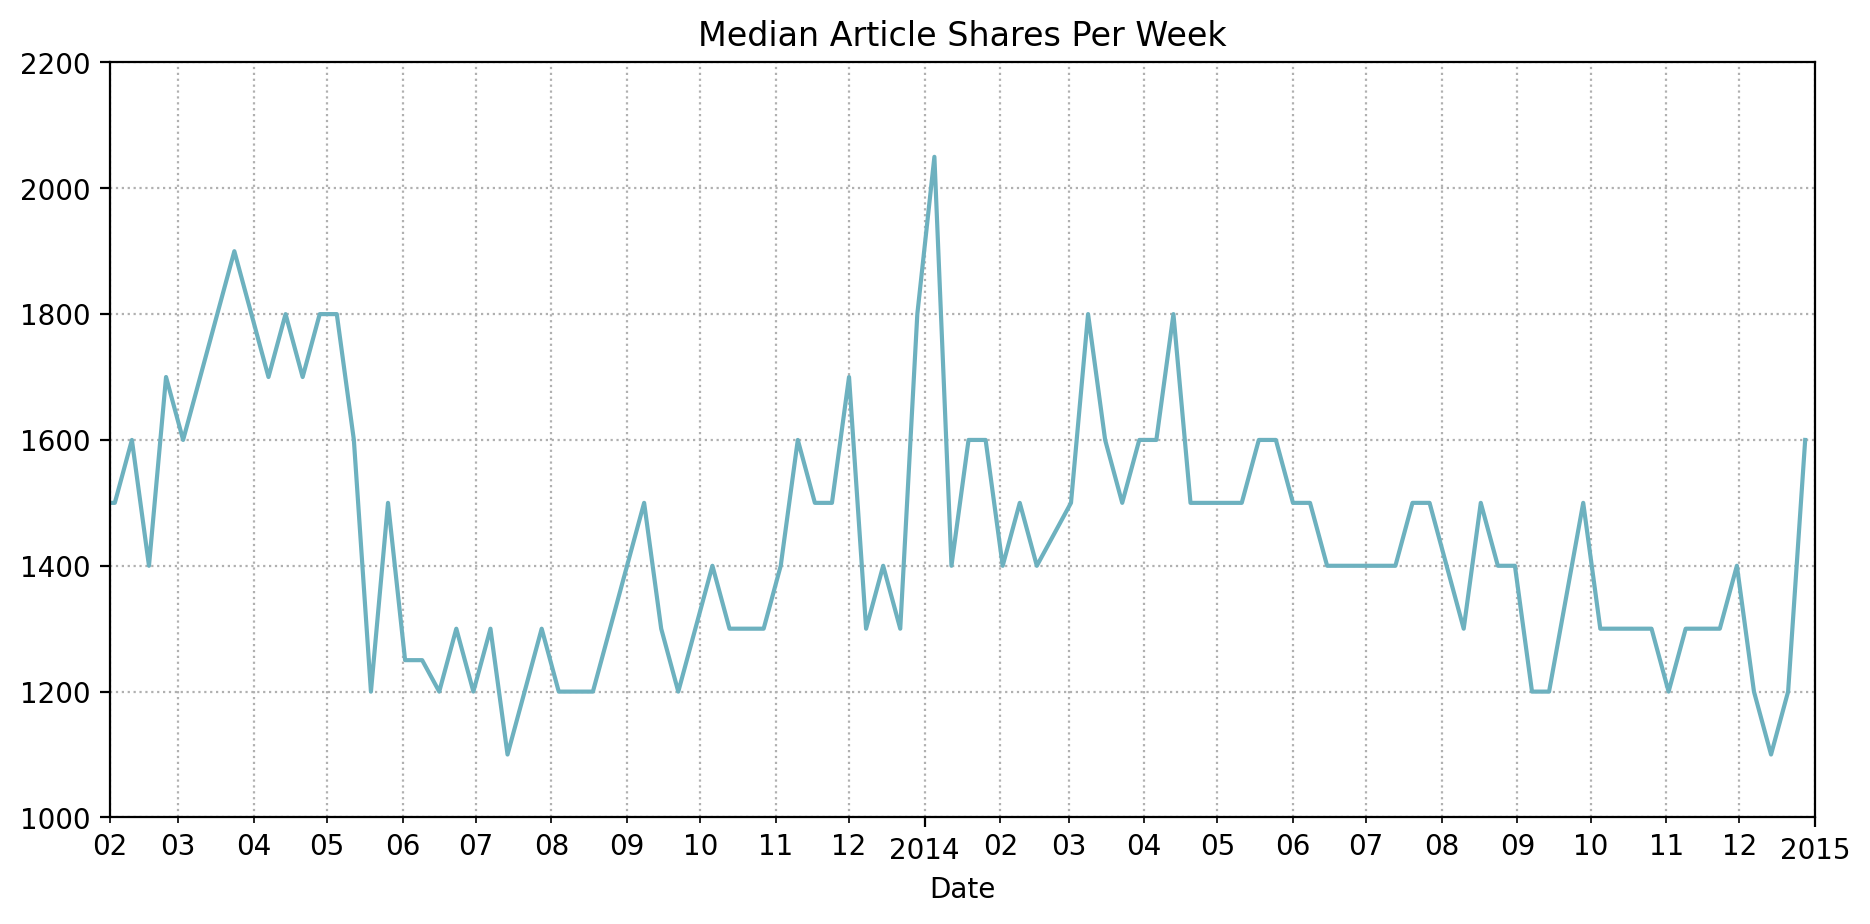

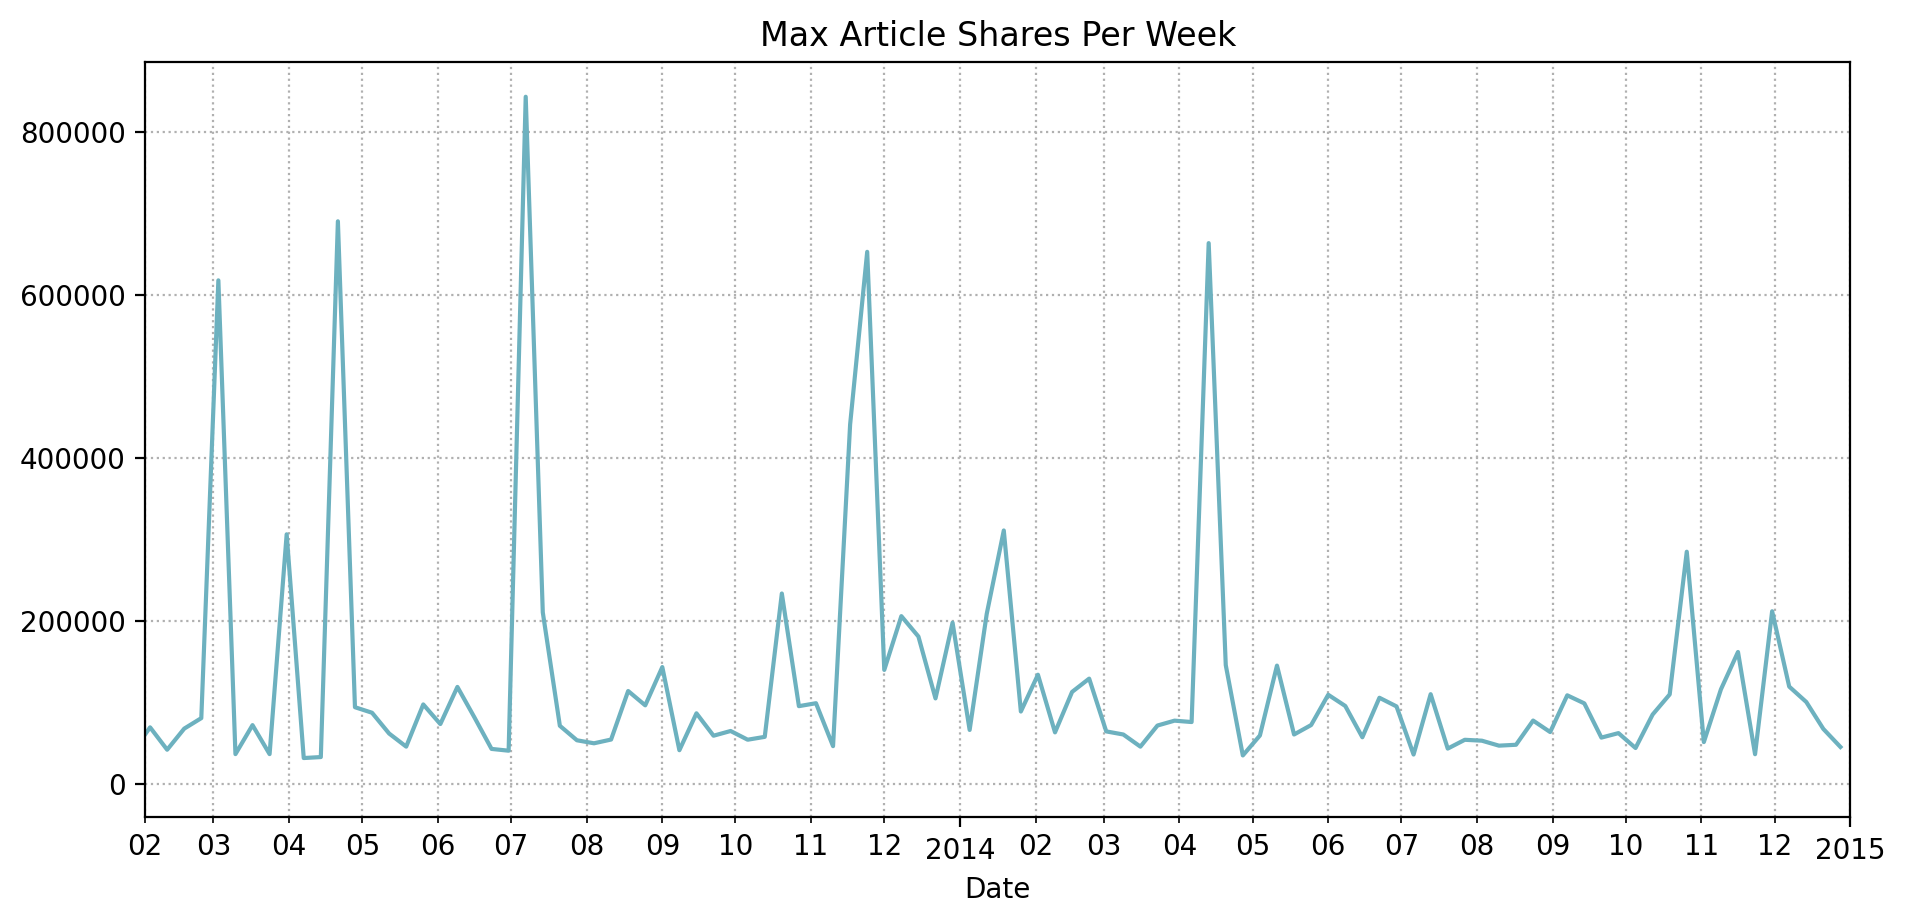

In [14]:
# Plot the amount of articles published per month
plot_date(shares_dates.resample('w').count())
plt.ylim(100,600)
plt.title("Articles Published Per Week")

# Plot the median shares of articles published per month
plot_date(shares_dates.resample('w').median())
plt.title("Median Article Shares Per Week")
plt.ylim(1000,2200)
    
# Plot the max of article shares per month
plot_date(shares_dates.resample('w').max())
plt.title("Max Article Shares Per Week")

In [17]:
viral_articles = shares_dates.resample('d').max() 
viral_articles = viral_articles[viral_articles.shares > 200000]
viral_articles.head()

,shares
date,
2013-02-28,227300.0
2013-03-02,617900.0
2013-03-28,306100.0
2013-04-15,690400.0
2013-07-03,843300.0


Text(0, 0.5, 'Median Shares')

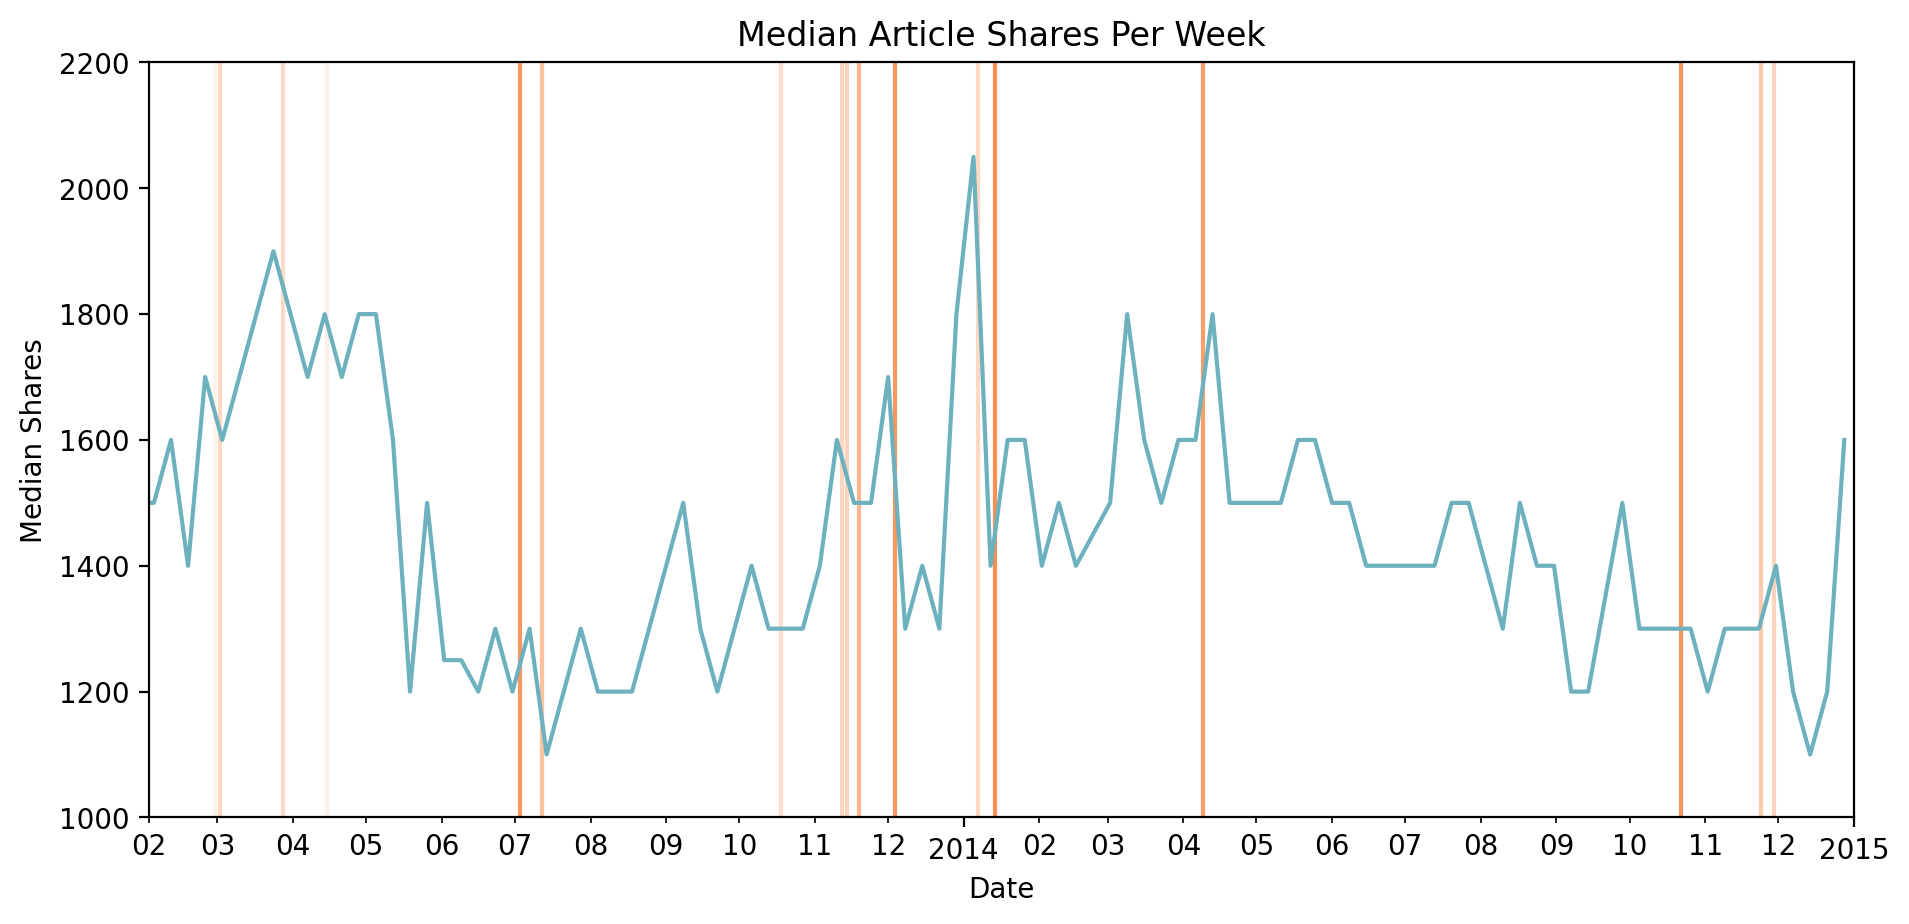

In [40]:
# Plot the median shares of articles published per month
plt.figure(figsize=(11,5),dpi=200)

ax = plt.subplot(111)
plt.plot_date(shares_dates.resample('w').median().index,shares_dates.resample('w').median().shares,xdate=True,linestyle='-',marker=None,color=c1)

plt.xlim([datetime(2013, 2, 1), datetime(2015, 1, 1)])
plt.xlabel('Date')
ax.xaxis.set_minor_locator(pltd.MonthLocator())
ax.xaxis.set_major_locator(pltd.YearLocator())
ax.xaxis.set_major_formatter(pltd.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(pltd.DateFormatter('%m'))
plt.title("Median Article Shares Per Week")

ylim_max = 2200
ylim_min = 1000

for article in viral_articles.index:
    y = np.linspace(ylim_min,ylim_max)
    x = [article for var in y]
    plt.plot_date(x,y,xdate=True,linestyle='-',marker=None,c=c3,zorder=-1,alpha=viral_articles.loc[article]['shares'])

plt.ylim(ylim_min,ylim_max)
plt.ylabel('Median Shares')

So it seems that in 2014 mashable started publishing more articles. Despite this, the median shares has fallen by around 200 shares per article. Could there be a difference in the articles that make those published in the past more popular? Or could it be that articles shares grow gradually over the months and newer ones just lack shares due to age?

Another interesting thing is that weeks where a viral article is published are often followed by a dip in median shares for articles published a week afterwards.

# Keywords
Using the scraped keywords, I tried to refine the origional keyword features so I can see what keywords are preforming well

In [52]:
key_col = data.columns[41:]
keywords = data[key_col]
keywords.describe().astype(int)

,kw_min_min,kw_min_avg,kw_min_max,kw_avg_min,kw_avg_avg,kw_avg_max,kw_max_min,kw_max_avg,kw_max_max
count,39468,39468,39468,39468,39468,39468,39468,39468,39468
mean,400,2441,93429,92,3437,398775,285,4742,339648
std,361,775,177515,211,426,282780,570,4036,297141
min,1,406,446,1,1029,1200,1,1334,3800
25%,54,1835,4500,5,3267,141400,36,3602,64400
50%,390,2587,16250,41,3431,310800,76,3807,196700
75%,629,3140,74100,56,3602,652900,422,4502,652900
max,4500,11650,843300,5800,40771,843300,15000,100459,843300


In [58]:
keywords.sort_values('kw_max_max',ascending=False)['kw_max'].head(10)

url
http://mashable.com/2014/06/12/samsung-galaxy-tab-s-ipad/           gadgets
http://mashable.com/2014/04/02/open-source-laptop/                  gadgets
http://mashable.com/2014/09/26/healthkit-apps-arrive/                  tech
http://mashable.com/2014/09/26/google-samsung-android-contracts/       tech
http://mashable.com/2014/04/02/apple-renesas-battery-life/           iphone
http://mashable.com/2013/06/19/lytro-wifi/                          gadgets
http://mashable.com/2014/04/02/feds-buying-it-work-xp/                 tech
http://mashable.com/2014/04/02/garey-busey-amazon/                  gadgets
http://mashable.com/2014/04/02/google-bus-saga-continues/              tech
http://mashable.com/2014/04/02/live-updates-amazon-video/           gadgets
Name: kw_max, dtype: object

In [59]:
kw_min = data['kw_min'].value_counts().head()
kw_avg = data['kw_avg'].value_counts().head()
kw_max = data['kw_max'].value_counts().head()

In [63]:
pd.DataFrame({'kw_min':kw_min.index,'kw_avg':kw_avg.index,'kw_max':kw_max.index})

,kw_min,kw_avg,kw_max
0,world,world,gadgets
1,business,entertainment,tech
2,sports,tech,entertainment
3,television,business,u.s.
4,entertainment,culture,viral video


The most common keywords show up alot which makes some sense since there are so many article under this keyword. Interestingly enough, gadets appears to be the most common best preforming keyword

# The Top
Lets take a look at these viral articles

In [77]:
viral_articles = data[data.shares >= 200000]
viral_articles.sort_values('shares',ascending=False).head(10)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,kw_min_avg,kw_min_max,kw_avg,kw_avg_min,kw_avg_avg,kw_avg_max,kw_max,kw_max_min,kw_max_avg,kw_max_max
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/07/03/low-cost-iphone/,554.0,12.0,688.0,0.500734,1.0,0.643357,28.0,3.0,15.0,1.0,...,3427,843300,iphone,43,4330,843300,iphone rumors,568,97434,843300
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/,633.0,11.0,893.0,0.517202,1.0,0.716730,17.0,11.0,0.0,11.0,...,3431,690400,marketing,76,3789,690400,dove,544,49936,690400
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/,274.0,13.0,2591.0,0.237708,1.0,0.371091,27.0,4.0,1.0,1.0,...,3431,690400,jobs,144,4457,663600,the first 100,642,64524,663600
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/,416.0,9.0,134.0,0.689394,1.0,0.851852,1.0,1.0,0.0,2.0,...,3267,652900,creativity,596,40771,652900,yeezus,213,66531,652900
http://mashable.com/2013/03/02/wealth-inequality/,677.0,11.0,382.0,0.487805,1.0,0.605809,15.0,3.0,11.0,1.0,...,3354,617900,videos,5,3666,617900,conversations,36,4365,690400
http://mashable.com/2013/11/12/roomba-880-review/,422.0,8.0,261.0,0.571429,1.0,0.595628,24.0,5.0,18.0,1.0,...,3491,843300,reviews,91,4876,441000,vacuum,728,75503,441000
http://mashable.com/2014/01/14/australia-heatwave-photos/,359.0,9.0,192.0,0.647368,1.0,0.754098,7.0,4.0,0.0,2.0,...,3223,310800,photography,4,3600,310800,australia,110,4064,310800
http://mashable.com/2013/03/28/blackberry-1-million/,651.0,10.0,905.0,0.460067,1.0,0.645161,3.0,2.0,21.0,0.0,...,3427,843300,blackberry,411,5477,306100,blackberry 10,469,9998,306100
http://mashable.com/2013/11/14/ibm-watson-brief/,420.0,12.0,198.0,0.556122,1.0,0.634921,15.0,1.0,14.0,1.0,...,3249,298400,first to know,183,3711,298400,yotaphone,678,100459,298400


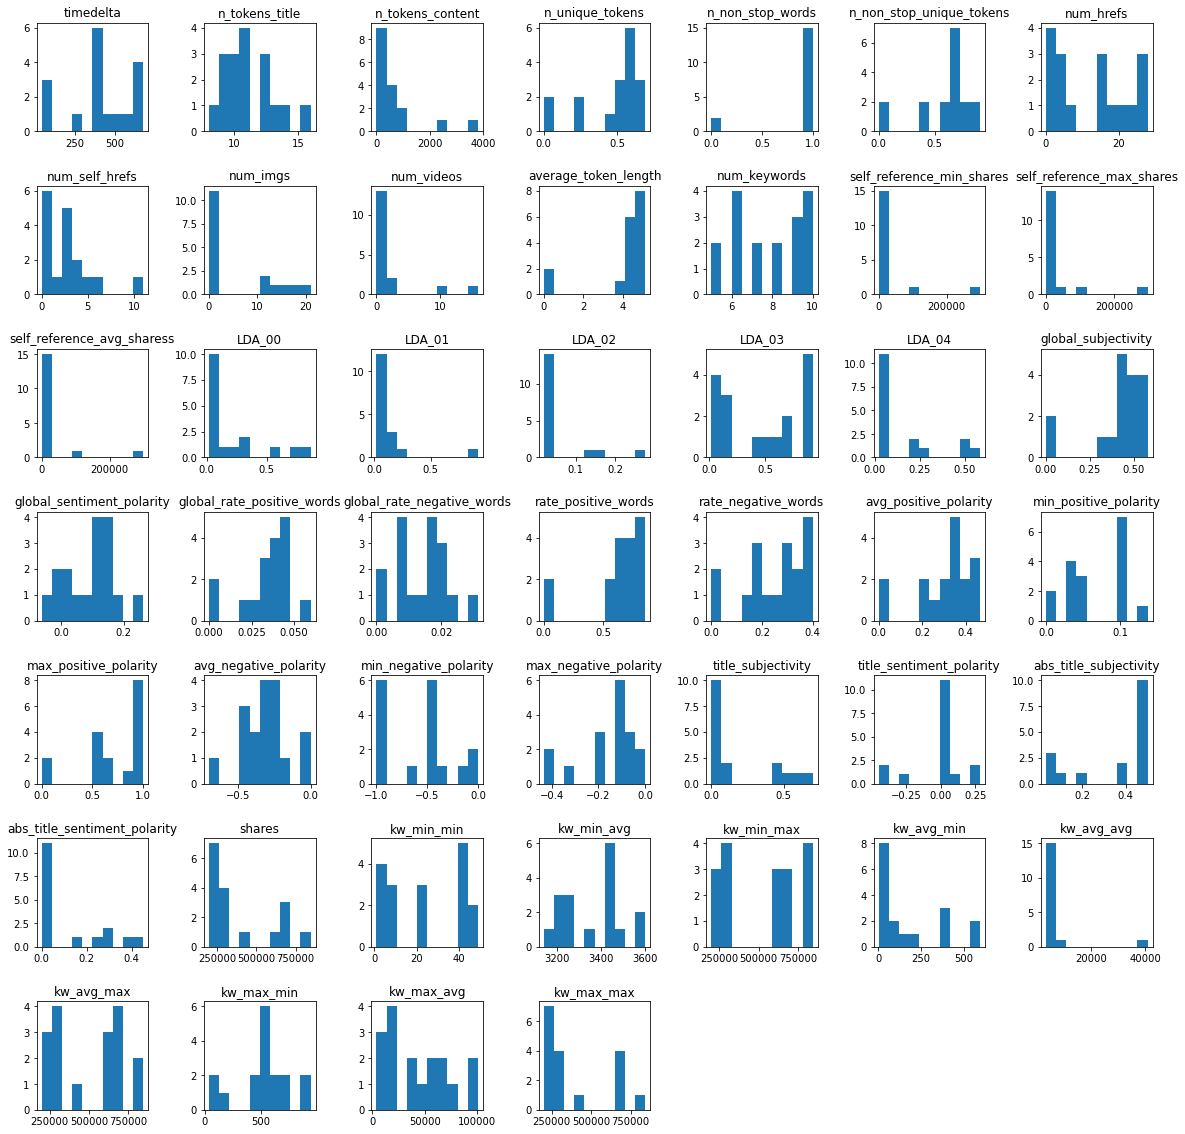

In [78]:
viral_articles.hist(figsize=(20,20),grid=False)
plt.subplots_adjust(hspace=0.5,wspace=0.5);

(46.0, 1.0)

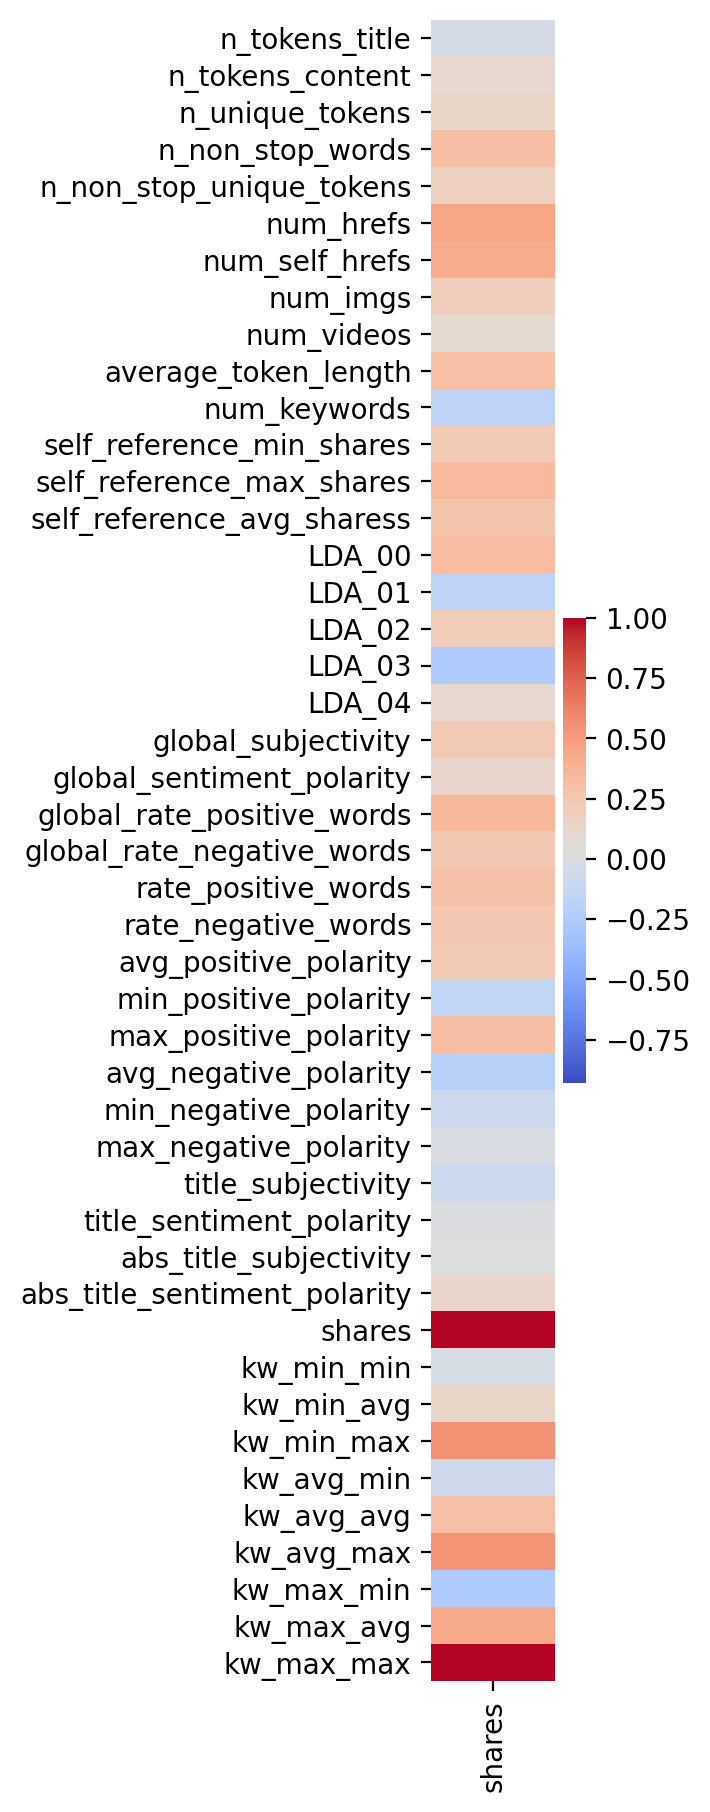

In [79]:
plt.figure(figsize=(1,11),dpi=200)
sns.heatmap(viral_articles.corr(),cmap='coolwarm')
plt.xlim(36,37)
plt.ylim(46,1)

Seems like the features with the greatest correlation to shares are the kw_max feautres. It also seems subjectivity and positive polarity have a slight negative correlation.

# Save Modeling Data

In [47]:
model_data = pd.get_dummies(data, columns=['channel','weekday'])

# drop the dates, we won't need them for modeling
model_data = model_data.drop(columns=['date','title','kw_max','kw_avg','kw_min','timedelta'])
model_data.to_csv('OnlineNewsPopularity_ForModeling.csv')

model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39468 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                39468 non-null  float64
 1   n_tokens_content              39468 non-null  float64
 2   n_unique_tokens               39468 non-null  float64
 3   n_non_stop_words              39468 non-null  float64
 4   n_non_stop_unique_tokens      39468 non-null  float64
 5   num_hrefs                     39468 non-null  float64
 6   num_self_hrefs                39468 non-null  float64
 7   num_imgs                      39468 non-null  float64
 8   num_videos                    39468 non-null  float64
 9   average_token_length          39468 non-null  float64
 10  num_keywords                  39468 non-null  float64
 11  self_reference_mi